In [20]:
%matplotlib inline


import pandas as pd
import scipy as stats
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

## Inferential Statistics

My goal in this section is to statistically prove a few things. I want to see with a 95% certainty that there is indeed a strong correlation between points and salary, WS and salary, and Minutes/Game and Salary. I will run bootstrap samples and check to see if there what the probability is that any of these correlations only happened by chance. If the probability of achieving a correlation of what I had in each one is lower than 5%, then I will say that the two statistics are significantly correlated.

I will also run Mann-Whitney tests to make sure that my conclusions are sound. 

My other goal in this section is to prove that there are real differences in the mean salary between some teams and positions. To do this, I will shuffle up the salaries and the players, then regroup them into teams and take the average salary again. I will take boostraps of this and see what the probability is of yieling a value as strong as the empirical mean difference between the two teams. 


In [21]:
Total2018 = pd.read_csv('Total2018_full')
Total2018 = Total2018.drop(labels = ['Unnamed: 0','Unnamed: 0.1'] , axis = 1)

In [3]:
Total2018.columns


Index([u'Rk', u'Tm', u'2018-19', u'Name', u'Pos', u'G', u'GS', u'FG', u'FG%',
       u'3P', u'3P%', u'eFG%', u'FT%', u'ORB', u'TRB', u'AST', u'STL', u'BLK',
       u'PS/G', u'TOV', u'Age', u'WS', u'PER', u'MP', u'TRB%', u'AST%',
       u'TOV%', u'OWS', u'DWS', u'M/G', u'AST/TOV', u'dollar_per_p/g'],
      dtype='object')

C:\Users\miste\Miniconda3\envs\tutorial\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


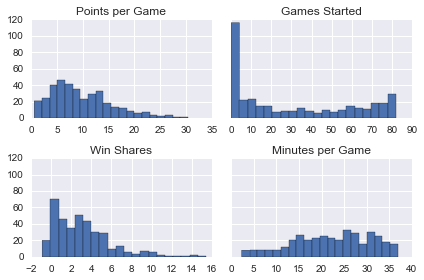

In [36]:
n_bins = 20
_ = fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
_ = axs[0,0].hist(Total2018['PS/G'], bins=n_bins)
_ = axs[0,0].set_title('Points per Game')
_ = axs[0,1].hist(Total2018['GS'], bins=n_bins)
_ = axs[0,1].set_title('Games Started')
_ = axs[1,0].hist(Total2018['WS'], bins=n_bins)
_ = axs[1,0].set_title('Win Shares')
_ = axs[1,1].hist(Total2018['M/G'], bins=n_bins)
_ = axs[1,1].set_title('Minutes per Game')



As you can see from the plots above, the four variables that I believe to be most important to a player's salary are not normal, and tend to be skewed to the right. Because of this, I will run normal tests that you usually run for normal distributions, but I will also do a Mann-Whitney test for each of them, and see if the results differ at all. 

#### Performing a permutation test on the $\rho$ for Points per Game and Salary at an $\alpha$ = 0.05 level

In [16]:
def pearson_r(data_1, data_2):
    r = np.corrcoef(data_1, data_2)[0, 1]
    return r

In [17]:
emp_points_coeff = pearson_r(Total2018['PS/G'],Total2018['2018-19'])
emp_points_coeff

0.6369452628098151


H_0: $\rho$ = 0.637

H_a: $\rho$ $\neq$ 0.637

Where $\rho$ is the Pearson Correlation Coefficient.

In [19]:
#In this loop, I shuffle the dataframe, keeping the pairs, but then slice out the last 10 percent of points. I then shuffle
#the salary data while keeping the points per game data unshuffled, and put them back together, so that they have new pairs. 
#Finally, I put this shuffled 10% of the data back with the other 90% of the data and take the new correlation. I do this 10,000 times.
import random
perm_data = np.empty(10000)
for i in range(10000):
    shuffled = Total2018[['2018-19','PS/G']].sample(frac = 1)
    unshuffled = shuffled[:int(round(len(shuffled)*0.9))]
    shuffled2 = shuffled[int(round(len(shuffled)*0.9)):]
    
    permuted = random.sample(shuffled2['2018-19'], len(shuffled2['2018-19']))
    permuted_frame = pd.DataFrame({'2018-19':permuted, 'PS/G': list(shuffled2['PS/G'].values)})
    
    total_shuff= unshuffled.append(permuted_frame)
    perm_data[i] = pearson_r(total_shuff['2018-19'], total_shuff['PS/G'])
p = np.sum(perm_data >= emp_points_coeff)/ float(len(perm_data))
p * 2 #since two sided test

0.0048

As you can see, the correlation is significant. I recieved a p of 0.004. Since p < $\alpha$, we can reject the null hypthesis that the pearson correlation coefficient is 0. 

### Using the Mann-Whitney test for non-normal distributions. 

In [306]:
MannWhitney_points = stats.stats.mannwhitneyu(Total2018['2018-19'], Total2018['PS/G'], alternative = 'greater')
MannWhitney_points

MannwhitneyuResult(statistic=142129.0, pvalue=3.832579953165935e-125)

Using the Mann Whitney test, our conclusion is even more convincing, at a p-value of the order of -125. This is definitely lower than 0.05. 

#### Performing permutation test on Win Shares vs Salary

In [259]:
emp_WS_coeff = pearson_r(Total2018['2018-19'],Total2018['WS'])
emp_WS_coeff

0.5914251612628756


H_0: $\rho$ = 0.591

H_a: $\rho$ $\neq$ 0.591

Where $\rho$ is the Pearson Correlation Coefficient.

In [317]:
import random
perm_data = np.empty(10000)
for i in range(10000):
    shuffled = Total2018[['2018-19','WS']].sample(frac = 1)
    unshuffled = shuffled[:int(round(len(shuffled)*0.9))]
    shuffled2 = shuffled[int(round(len(shuffled)*0.9)):]
    
    permuted = random.sample(shuffled2['2018-19'], len(shuffled2['2018-19']))
    permuted_frame = pd.DataFrame({'2018-19':permuted, 'WS': list(shuffled2['WS'].values)})
    
    total_shuff= unshuffled.append(permuted_frame)
    perm_data[i] = (pearson_r(total_shuff['2018-19'], total_shuff['WS']))
p = np.sum(perm_data >= emp_WS_coeff)/ float(len(perm_data))
p*2

0.015

Since 0.015 > 0.05, we cannot say that $\rho$ $\neq$ 0.591

In [318]:
MannWhitney_WS = stats.stats.mannwhitneyu(Total2018['2018-19'], Total2018['WS'], alternative = 'greater')
MannWhitney_WS

MannwhitneyuResult(statistic=142129.0, pvalue=3.789433018467404e-125)

Performing tests on rebounds

In [32]:
emp_GS_coeff = pearson_r(Total2018['2018-19'],Total2018['GS'])
emp_GS_coeff

0.569134531284937


H_0: $\rho$ = 0.569

H_a: $\rho$ $\neq$ 0.569

Where $\rho$ is the Pearson Correlation Coefficient.

In [33]:
import random
perm_data = np.empty(10000)
for i in range(10000):
    shuffled = Total2018[['2018-19','GS']].sample(frac = 1)
    unshuffled = shuffled[:int(round(len(shuffled)*0.9))]
    shuffled2 = shuffled[int(round(len(shuffled)*0.9)):]
    
    permuted = random.sample(shuffled2['2018-19'], len(shuffled2['2018-19']))
    permuted_frame = pd.DataFrame({'2018-19':permuted, 'GS': list(shuffled2['GS'].values)})
    
    total_shuff= unshuffled.append(permuted_frame)
    perm_data[i] = (pearson_r(total_shuff['2018-19'], total_shuff['GS']))
p = np.sum(perm_data >= emp_GS_coeff)/ float(len(perm_data))
p * 2

0.0092

Since 0.0092 < 0.05, then I cannot conclude that $\rho$ $\neq$ 0.569

In [34]:
MannWhitney_GS = stats.stats.mannwhitneyu(Total2018['2018-19'], Total2018['GS'], alternative = 'greater')
MannWhitney_GS

MannwhitneyuResult(statistic=142129.0, pvalue=3.4878487776321864e-125)

Running the test on Minutes per Game and Salary

In [373]:
emp_MG_coeff = pearson_r(Total2018['2018-19'],Total2018['M/G'])
emp_MG_coeff

0.5835456716338305


H_0: $\rho$ = 0.583

H_a: $\rho$ $\neq$ 0.583

Where $\rho$ is the Pearson Correlation Coefficient.

In [374]:
import random
perm_data = np.empty(10000)
for i in range(10000):
    shuffled = Total2018[['2018-19','M/G']].sample(frac = 1)
    unshuffled = shuffled[:int(round(len(shuffled)*0.9))]
    shuffled2 = shuffled[int(round(len(shuffled)*0.9)):]
    
    permuted = random.sample(shuffled2['2018-19'], len(shuffled2['2018-19']))
    permuted_frame = pd.DataFrame({'2018-19':permuted, 'M/G': list(shuffled2['M/G'].values)})
    
    total_shuff= unshuffled.append(permuted_frame)
    perm_data[i] = (pearson_r(total_shuff['2018-19'], total_shuff['M/G']))
p = np.sum(perm_data >= emp_MG_coeff)/ float(len(perm_data))
p * 2

0.006

Since 0.006 < 0.05, then I cannot conclude that $\rho$ $\neq$ 0.583

In [375]:
MannWhitney_MG = stats.stats.mannwhitneyu(Total2018['2018-19'], Total2018['M/G'], alternative = 'greater')
MannWhitney_MG

MannwhitneyuResult(statistic=142129.0, pvalue=3.842716033511119e-125)

## Comparing the means between two different groups. Either teams or positions. 

For each of these different pairings, I will do two different tests. One with a bootstrapping technique, and one using a module to obtain a t-score and p-value.

In [265]:
by_team = Total2018[['2018-19','Tm']].groupby('Tm').mean().sort_values(by = '2018-19', ascending = False)
by_team.head(5)

,2018-19
Tm,
GSW,12746893
OKC,12323171
WAS,11404212
TOR,11134140
MIA,10430029


The top 5 highest average salaries in the NBA belong to GSW, OKC, WAS, TOR, MIA. 

In [266]:
emp_mean_diff = by_team['2018-19'].loc['GSW'] - by_team['2018-19'].loc['OKC']
emp_mean_diff

423722

By subtracting the mean difference between the top two teams, I have found that they only differ by abotu \$423,722

#### Obtaining a p-value for difference in means to see if this mean difference is truly significant. 

H_0: $\mu_{GSW}$ = $\mu_{OKC}$

H_a: $\mu_{GSW}$ > $\mu_{OKC}$

with a $\alpha$ = 0.05 level

In [267]:
GSW_sal = Total2018['2018-19'].loc[Total2018['Tm'] =='GSW']
OKC_sal = Total2018['2018-19'].loc[Total2018['Tm'] == 'OKC']


In [268]:
def permutations(data_1, data_2):
    data = np.concatenate((data_1, data_2))
    perms = np.random.choice(data, len(data))
    perm_team1 = perms[:len(data_1)]
    perm_team2 = perms[len(data_1):]
    return perm_team1, perm_team2

In [269]:
def bootstrap(data_1, data_2, size):
    boots = np.empty(size)
    for i in range(size):
        perm_team1, perm_team2 = permutations(data_1, data_2)
        boots[i] = np.mean(perm_team1) - np.mean(perm_team2)
    return boots

In [270]:
theo_mean_diffs = bootstrap(GSW_sal, OKC_sal, 10000)
p = np.sum(theo_mean_diffs >= emp_mean_diff) / float(len(theo_mean_diffs))
p

0.466

At a p-value of 0.4593, we are unable to reject the null hypothesis that the Golden State Warriors players have the same average salary as the players on the Oklahoma City Thunder. 

#### Using the ttest from scipy.stats to preform the same test

In [271]:
t_GSW_OKC = stats.stats.ttest_ind(Total2018['2018-19'].loc[Total2018['Tm']=='GSW'], Total2018['2018-19'].loc[Total2018['Tm'] == 'OKC'])
t_GSW_OKC.pvalue / 2

0.46719365408651387

As this returns a 2 sided p-value, I divided it by 2 to get the 1-sided. It returns approximately the same thing. 

Now, going to check to see if the difference between the highest average salary team and the lowest salary team is significant. I will be using the same hypotheses.

In [272]:
by_team.tail(1)

,2018-19
Tm,
SAC,5316770


In [273]:
emp_mean_diff2 = by_team['2018-19'].loc['GSW'] - by_team['2018-19'].loc['SAC']
emp_mean_diff2

7430123

This time, the mean difference is over \$7,000,000

#### Obtaining a p-value for difference in means to see if this mean difference is truly significant. 

H_0: $\mu_{GSW}$ = $\mu_{SAC}$

H_a: $\mu_{GSW}$ > $\mu_{SAC}$

with a $\alpha$ = 0.05 level

In [274]:
SAC_sal = Total2018['2018-19'].loc[Total2018['Tm'] == 'SAC']

In [275]:
theo_mean_diffs2 = bootstrap(GSW_sal, SAC_sal, 10000)
p = np.sum(theo_mean_diffs2 >= emp_mean_diff2) / float(len(theo_mean_diffs2))
p

0.0265

Since 0.025 < 0.05, we can confidently reject the null hypothesis that the Warriors have the same average salary as the Kings. 

In [276]:
t_GSW_SAC = stats.stats.ttest_ind(Total2018['2018-19'].loc[Total2018['Tm']=='GSW'], Total2018['2018-19'].loc[Total2018['Tm'] == 'SAC'])
t_GSW_SAC.pvalue / 2

0.025815037883294954

The result here is the same. 

### Checking to see if the mean of the highest paid team is sgnificantly different than the rest of the NBA

H_0: $\mu_{GSW}$ = $\mu_{NBA}$

H_a: $\mu_{GSW}$ $\neq$ $\mu_{NBA}$

In [282]:
emp_mean_diff3 = by_team['2018-19'].loc['GSW'] - np.mean(Total2018['2018-19'].loc[Total2018['Tm'] != 'GSW'])
theo_mean_diffs3 = bootstrap(GSW_sal, Total2018['2018-19'], 10000)
p = np.sum(theo_mean_diffs3 >= emp_mean_diff3) / float(len(theo_mean_diffs3))
p*2


0.1316

Since 0.1394 > 0.05, then we cannot conclude at an $\alpha$ = 0.05 level that there is a sgnificant difference between the Warriors and the rest of the NBA.

In [283]:
t = stats.stats.ttest_ind(Total2018['2018-19'].loc[Total2018['Tm']=='GSW'], Total2018['2018-19'].loc[Total2018['Tm'] != 'GSW'])
t

Ttest_indResult(statistic=1.6038617074009456, pvalue=0.1095863948108629)

Using the t-test, I can come to the same conclusion.

### Performing the same test, except across two different positions, instead of teams. 

In [277]:
by_pos = Total2018[['2018-19','Pos']].groupby('Pos').mean().sort_values(by = '2018-19', ascending = False)
by_pos

,2018-19
Pos,
C,9015264
PF,9003547
SF,9000546
PG,8805145
SG,8436526
SF-SG,1238616


H_0: $\mu_{C}$ = $\mu_{SG}$

H_a: $\mu_{C}$ > $\mu_{SG}$

In [278]:
emp_mean_tm = by_pos['2018-19'].loc['C'] - by_pos['2018-19'].loc['SG']
emp_mean_tm

578738

In [279]:
SG_sal = Total2018['2018-19'].loc[Total2018['Pos'] == 'SG']
C_sal = Total2018['2018-19'].loc[Total2018['Pos'] == 'C']


In [280]:
theo_mean_tm = bootstrap(C_sal, SG_sal, 10000)
p = np.sum(theo_mean_tm >= emp_mean_tm) / float(len(theo_mean_tm))
p

0.3153

Since 0.309 > 0.05, then I cannot conclude that there is any difference between the salaries of two different positions in the NBA.

In [281]:
t_C_SG = stats.stats.ttest_ind(Total2018['2018-19'].loc[Total2018['Pos']=='C'], Total2018['2018-19'].loc[Total2018['Pos'] == 'SG'])
t_C_SG.pvalue / 2

0.31189332447762497

This p-value is still significantly greater than 0.05. 

### Performing Ordinary Least Squares Regression with features that I decided looked to be strongly correlated with salary from my initial EDA

In [285]:
Total2018['3P%'] = Total2018['3P%'].fillna(0)
Total2018['FT%'] = Total2018['FT%'].fillna(0)

C:\Users\miste\Miniconda3\envs\tutorial\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


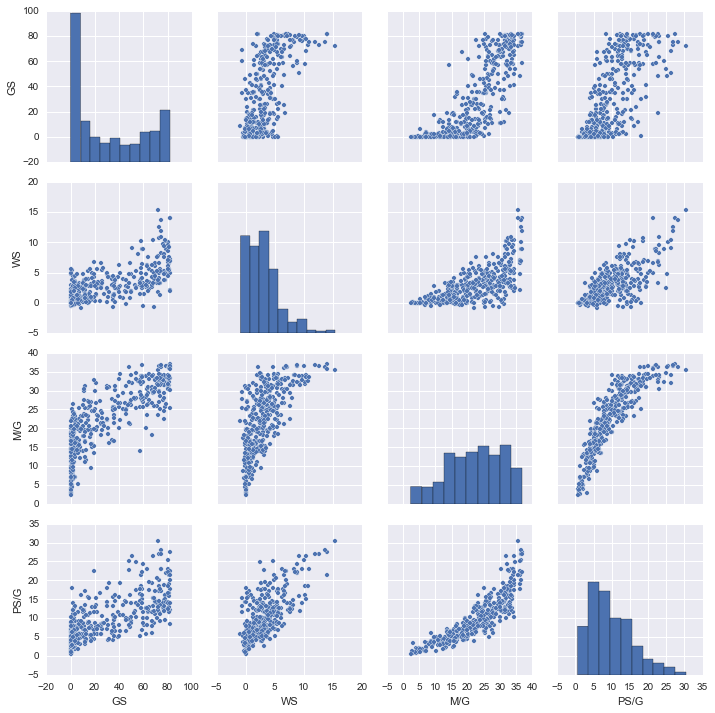

In [22]:
_ = sns.pairplot(Total2018[['GS','WS','M/G','PS/G']])

From the 4 big stats that I hypothesized had the biggest effect on salary, I can see that there are quite a few that are correlated. Points per game and minutes per game are strongly correlated, Win Shares and Points Per Game, and minutes per game and Win Shares are correlated (which is because of the correlation between points and minutes).

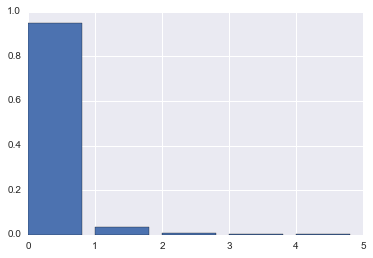

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
model = pca.fit(Total2018[['GS','WS','PS/G','M/G','TRB']])
_ = plt.bar(range(len(model.explained_variance_)), model.explained_variance_ratio_)


From Principal Component Analysis, I can see that there is only 1 Principal Component. This makes sense, because all of the statistics are highly, or at least partially, correlated with one another. This is just from the nature of the game of basketball. If you play a lot of minutes, you will most likely score more, get more rebounds, and provide more wins for the team. And if you are doing all of this well, then you will play more games as well. This can also be seen in the plots above.

For this reason, I will only run the OLS with Points Per Game and Games played, as these two are the only ones that do not have a strong correlation with eachother. 

In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

X = (Total2018[['PS/G','GS']])
y = Total2018['2018-19']
X2 = sm.add_constant(X)


In [25]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                2018-19   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     143.5
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           5.68e-47
Time:                        09:58:46   Log-Likelihood:                -6431.6
No. Observations:                 377   AIC:                         1.287e+04
Df Residuals:                     374   BIC:                         1.288e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.378e+05   6.23e+05      0.542      0.5

Running the OLS regression again, except slowly removing variables until all p-values are low 

In [28]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

X = Total2018.drop(['2018-19','TOV','TRB','PER','M/G','Rk','Name','GS','TOV%','Pos','Tm','3P','ORB','3P%','Age','AST/TOV','dollar_per_p/g','FT%','BLK','OWS','DWS','MP','TRB%','eFG%','STL','FG','FG%'], axis = 1)
y = Total2018['2018-19']
X2 = sm.add_constant(X)


In [29]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                2018-19   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     75.38
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           2.30e-54
Time:                        09:59:06   Log-Likelihood:                -6406.8
No. Observations:                 377   AIC:                         1.283e+04
Df Residuals:                     371   BIC:                         1.285e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.782e+06   1.14e+06      5.970      0.0